# Trabajo final - Análisis de datos con Python

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("https://cocl.us/datascience_survey_data",index_col=0)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [57]:
df.sort_values(by="Very interested", ascending=False, axis=0, inplace=True)
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


''

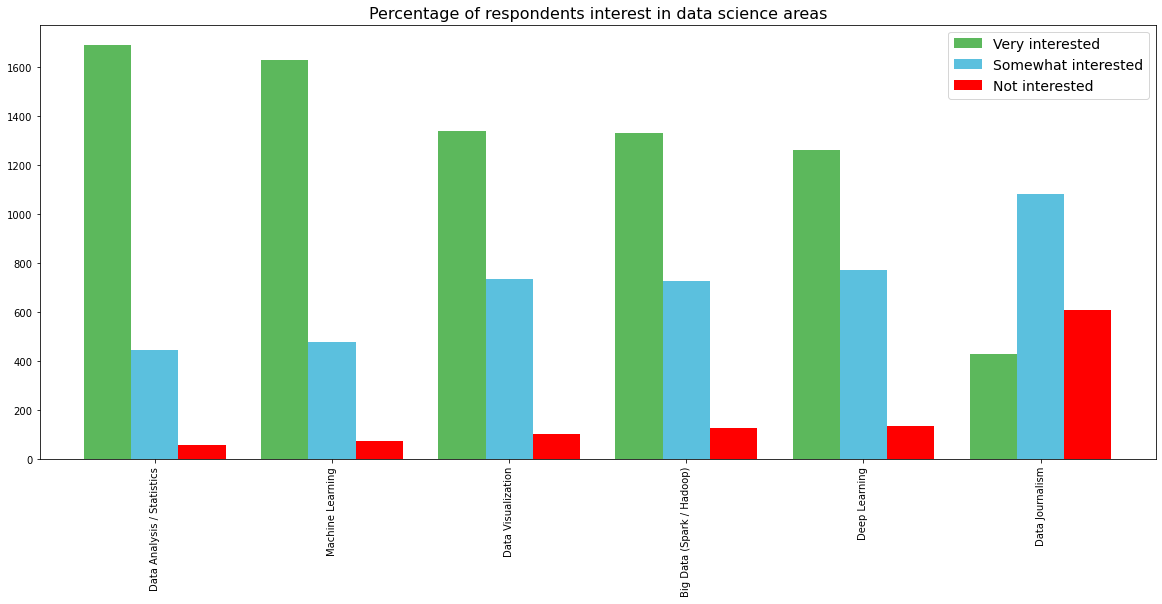

In [64]:
colort = ["#5cb85c", "#5bc0de", "red"]
df.plot(kind="bar", figsize=(20,8), width=0.8, color=colort)
plt.title("Percentage of respondents interest in data science areas", fontsize=16)
plt.legend(fontsize=14, loc="upper right")
;

In [204]:
df1 = pd.read_csv("https://cocl.us/sanfran_crime_dataset",header=0)
df1.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [205]:
df1.columns=list(map(str, df1.columns))
df_sf = df1[["PdDistrict", "Descript"]].groupby(["PdDistrict"]).count()
df_sf

,Descript
PdDistrict,
BAYVIEW,14303
CENTRAL,17666
INGLESIDE,11594
MISSION,19503
NORTHERN,20100
PARK,8699
RICHMOND,8922
SOUTHERN,28445
TARAVAL,11325


In [120]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('ok')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.9

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.2.0               |     pyhd8ed1ab_1         711 KB  conda-forge
    branca-0.5.0               |     pyhd8ed1ab_0          26 KB  conda-forge
    certifi-2022.6.15          |   py39hf3d152e_0         155 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    widgetsnbextension-3.5.1   |   py39hf3d152e_4         1.8 MB  conda-forge
    ------------------------------------------------------------
               

In [206]:
!wget --quiet https://cocl.us/sanfran_geojson.json
print("ok")

ok


In [207]:
world_geo = r'sanfran_geojson.json'
print("ok")

ok


In [208]:
SF_map = folium.Map(location=[37.77,-122.40], zoom_start=12)
SF_map

In [213]:
world_geo = r'san-francisco.geojson'
SF_map = folium.Map(location=[37.77,-122.40], zoom_start=12)
SF_map.choropleth(geo_data=world_geo, 
                  data=df_sf,
                  columns=["DISTRICT", "count"],
                  key_on="feature.properties.DISTRICT", 
                  fill_color="YlOrRd", 
                  fill_opacity=0.7, 
                  line_opacity=0.2, 
                  legend_name="Crime rate in San Francisco")
SF_map

KeyError: "None of ['DISTRICT'] are in the columns"